In [ ]:
# Importando as bibliotecas
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Definindo as funções

# Wavelet Ricker
def Ricker(fs,t):
    R = (1 - 2 * np.pi**2 * fs**2 * t**2 ) * (np.exp(-np.pi**2 * fs**2 * t**2))
    return R

# wavelet ormsby
def  Ormsby(f1, f2, f3, f4, t):
    w1 = (((np.pi * f4)**2)/(np.pi*f4 - np.pi*f3)) * np.sinc(f4 * t)**2
    w2 = (((np.pi * f3)**2)/(np.pi*f4 - np.pi*f3)) * np.sinc(f3 * t)**2
    w3 = (((np.pi * f2)**2)/(np.pi*f2 - np.pi*f1)) * np.sinc(f2 * t)**2
    w4 = (((np.pi * f1)**2)/(np.pi*f2 - np.pi*f1)) * np.sinc(f1 * t)**2

    O = ((w1 - w2) - (w3 - w4))
    return O

# wavelet klauder
def Klauder(TT, t, f1, f2):
    k = (f2-f1)/TT  # Taxa de variação da frequência com o tempo
    f0 = (f2 + f1)/2
    kl = np.real(np.sin(np.pi * k * t *(TT - t))/(np.pi * k* t))* np.exp(2 * np.pi * 1j * f0 * t)
    return kl

# Transformada de Fourier
def fft_wavelet(n, s, dt):
    freq = np.fft.fftfreq(n, dt)  # Cálculo da frequência
    mascara = freq > 0
    fft_calculo = np.fft.fft(s)  # Cálculo da transformada do sinal final
    fft_abs = 2.0 * np.abs(fft_calculo / n)

    return mascara, freq, fft_abs

# Calculo da Refletividade
def reflectivity(velocidade, densidade):
    z = densidade * velocidade
    refl = np.zeros(len(z))

    for i in range(len(z)-1):
        z2 = z[i+1]
        z1 = z[i]
        refl[i] = (z2 - z1) / (z2 + z1)

    return refl

In [ ]:
# Parametros geral
T = 1   # tempo em segundos
dt = 0.002  # taxa de amostragem
n = int((T/dt)+1) # numero de amostra
t = np.linspace(0, T, n, endpoint=False)   #base de tempo
tlag= 0.5 # Deslocamento no tempo em segundo

fs = 10  #frequencia do sinal ricker

#Parametros de frequencia Ormsby
f1 = 5   # frequência de corte baixo
f2 = 10  # frequência passa-baixa
f3 = 40  # frequência passa-alta
f4 = 45  # frequência de corte alta

# Parametro Klauder
TT = 7  # Duração do sinal de entrada
f1k = 10  # baixa frequência
f2k = 40  # alta frequência

# Calculos das Funções

# 1 ###########################################################
# Função Wavelet Ricker
R = Ricker(fs, t-tlag)
mascara, freqR, fft_absR = fft_wavelet(n, R, dt)

# Integral  da wavelet Ricker
int_R = np.cumsum(R)
mascara, freq_intR, fft_abs_intR = fft_wavelet(n, int_R, dt)
# ##############################################################

# 2 ############################################################
#Função Wavelet Ormsby
O = Ormsby(f1, f2, f3, f4, t-tlag)
mascara, freqO, fft_absO = fft_wavelet(n, O, dt)

# Integral  da Wavelet Ormsby
int_O = np.cumsum(O)
mascara, freq_intO, fft_abs_intO = fft_wavelet(n, int_O, dt)
###############################################################

# 3 ############################################################
#Função Wavelet Klauder
Kl = Klauder(TT, t-tlag, f1k, f2k)
mascara, freqk, fft_absk = fft_wavelet(n, Kl, dt)

# Integral  da wavelet Klauder
int_K = np.cumsum(Kl)
mascara, freq_intK, fft_abs_intK = fft_wavelet(n, int_K, dt)
###############################################################

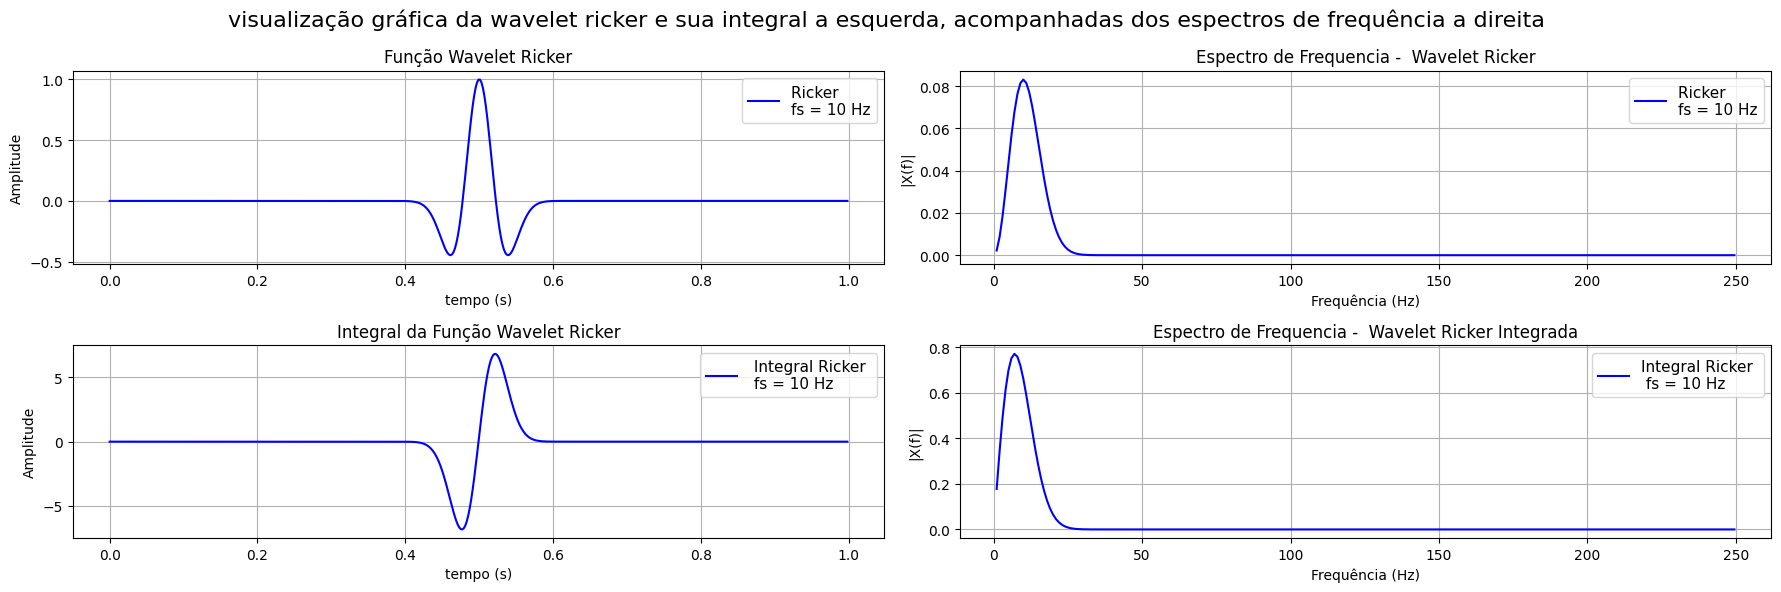

In [ ]:
# PLOT DOS GRAFICOS
plt.figure(figsize=(18, 6))
plt.suptitle("visualização gráfica da wavelet ricker e sua integral a esquerda, acompanhadas dos espectros de frequência a direita", fontsize=16)

# Plot wavelet ricker
plt.subplot(2,2,1)
plt.title('Função Wavelet Ricker', fontsize=12)
plt.plot(t, R, 'b',  label="Ricker \nfs = {} Hz".format(fs))
plt.grid()
plt.xlabel('tempo (s)', fontsize=10) # Legenda do eixo x
plt.ylabel('Amplitude', fontsize=10)  # Legenda do eixo y
plt.legend(loc='upper right', fontsize=11)

plt.subplot(2,2,2)
plt.title('Espectro de Frequencia -  Wavelet Ricker', fontsize=12)
plt.plot(freqR[mascara], fft_absR[mascara], 'b' , label="Ricker \nfs = {} Hz".format(fs))
plt.grid()
plt.xlabel('Frequência (Hz)', fontsize=10)  # legenda do eixo x
plt.ylabel('|X(f)|', fontsize=10)  # legenda do eixo y
plt.legend(loc='upper right', fontsize=11)

# Plot integral wavelet ricker
plt.subplot(2,2,3)
plt.title('Integral da Função Wavelet Ricker', fontsize=12)
plt.plot(t, int_R, 'b', label=" Integral Ricker \n fs = {} Hz".format(fs))
plt.grid()
plt.xlabel('tempo (s)', fontsize=10) # Legenda do eixo x
plt.ylabel('Amplitude', fontsize=10)  # Legenda do eixo y
plt.legend(loc='upper right', fontsize=11)

plt.subplot(2,2,4)
plt.title('Espectro de Frequencia -  Wavelet Ricker Integrada', fontsize=12)
plt.plot(freq_intR[mascara], fft_abs_intR[mascara], 'b', label="Integral Ricker \n fs = {} Hz".format(fs))
plt.grid()
plt.xlabel('Frequência (Hz)', fontsize=10)  # legenda do eixo x
plt.ylabel('|X(f)|', fontsize=10)  # legenda do eixo y
plt.legend(loc='upper right', fontsize=11)

##############################################################################
plt.tight_layout()
plt.show()

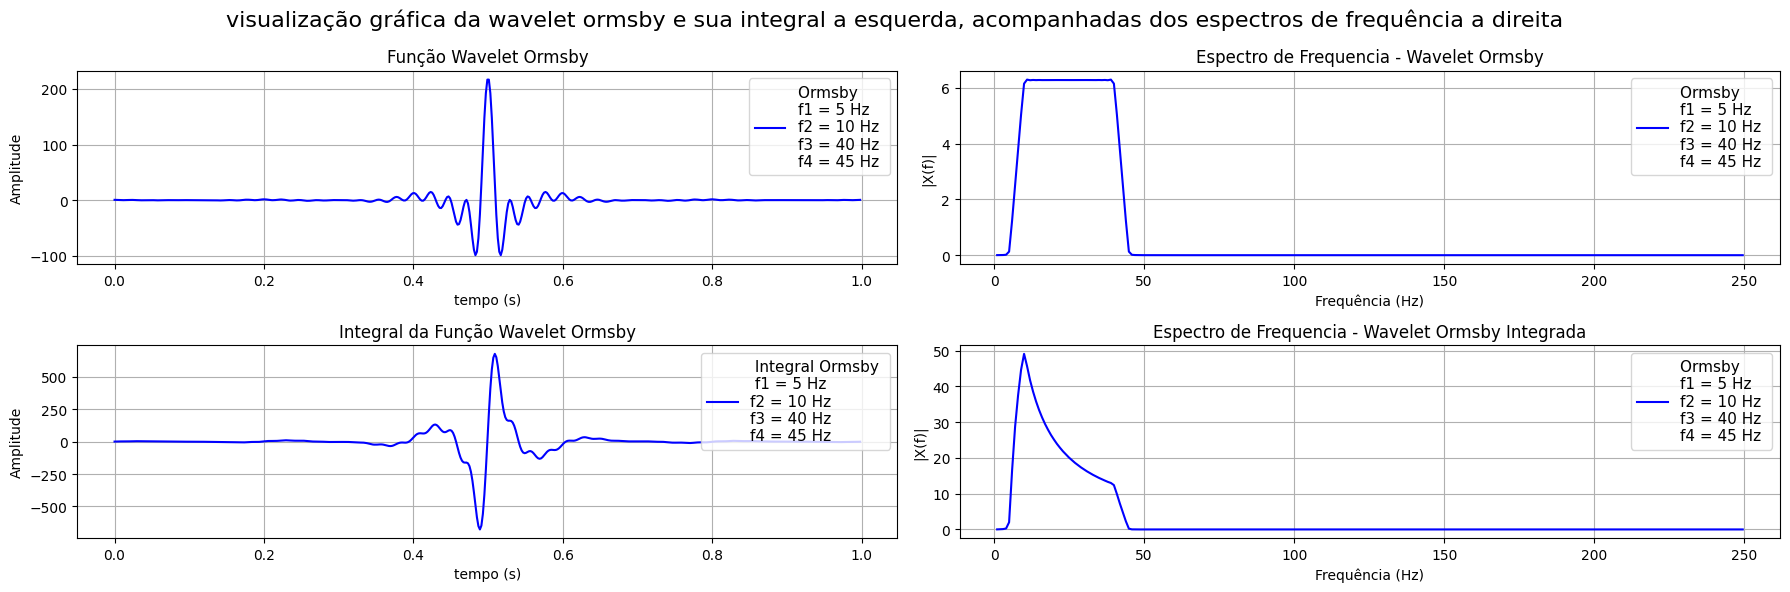

In [ ]:
plt.figure(figsize=(18, 6))
plt.suptitle("visualização gráfica da wavelet ormsby e sua integral a esquerda, acompanhadas dos espectros de frequência a direita", fontsize=16)

# plot wavalet ormsby
plt.subplot(2,2,1)
plt.title('Função Wavelet Ormsby', fontsize=12)
plt.plot(t, O, 'b-', label= 'Ormsby \nf1 = {} Hz \nf2 = {} Hz \nf3 = {} Hz \nf4 = {} Hz'.format(f1, f2, f3, f4))
plt.grid()
plt.xlabel('tempo (s)', fontsize=10) # Legenda do eixo x
plt.ylabel('Amplitude', fontsize=10)  # Legenda do eixo y
plt.legend(loc='upper right', fontsize=11)

plt.subplot(2,2,2)
plt.title('Espectro de Frequencia - Wavelet Ormsby', fontsize=12)
plt.plot(freqO[mascara], fft_absO[mascara], 'b-', label= 'Ormsby \nf1 = {} Hz \nf2 = {} Hz \nf3 = {} Hz \nf4 = {} Hz'.format(f1, f2, f3, f4))
plt.grid()
plt.xlabel('Frequência (Hz)', fontsize=10)  # legenda do eixo x
plt.ylabel('|X(f)|', fontsize=10)  # legenda do eixo y
plt.legend(loc='upper right', fontsize=11)

# Plot integral wavelet Ormsby
plt.subplot(2,2,3)
plt.title('Integral da Função Wavelet Ormsby', fontsize=12)
plt.plot(t, int_O, 'b-', label= ' Integral Ormsby \n f1 = {} Hz \nf2 = {} Hz \nf3 = {} Hz \nf4 = {} Hz'.format(f1, f2, f3, f4))
plt.grid()
plt.xlabel('tempo (s)', fontsize=10) # Legenda do eixo x
plt.ylabel('Amplitude', fontsize=10)  # Legenda do eixo y
plt.legend(loc='upper right', fontsize=11)

plt.subplot(2,2,4)
plt.title('Espectro de Frequencia - Wavelet Ormsby Integrada', fontsize=12)
plt.plot(freq_intO[mascara], fft_abs_intO[mascara], 'b-', label= 'Ormsby \nf1 = {} Hz \nf2 = {} Hz \nf3 = {} Hz \nf4 = {} Hz'.format(f1, f2, f3, f4))
plt.grid()
plt.xlabel('Frequência (Hz)', fontsize=10)  # legenda do eixo x
plt.ylabel('|X(f)|', fontsize=10)  # legenda do eixo y
plt.legend(loc='upper right', fontsize=11)

##############################################################################
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


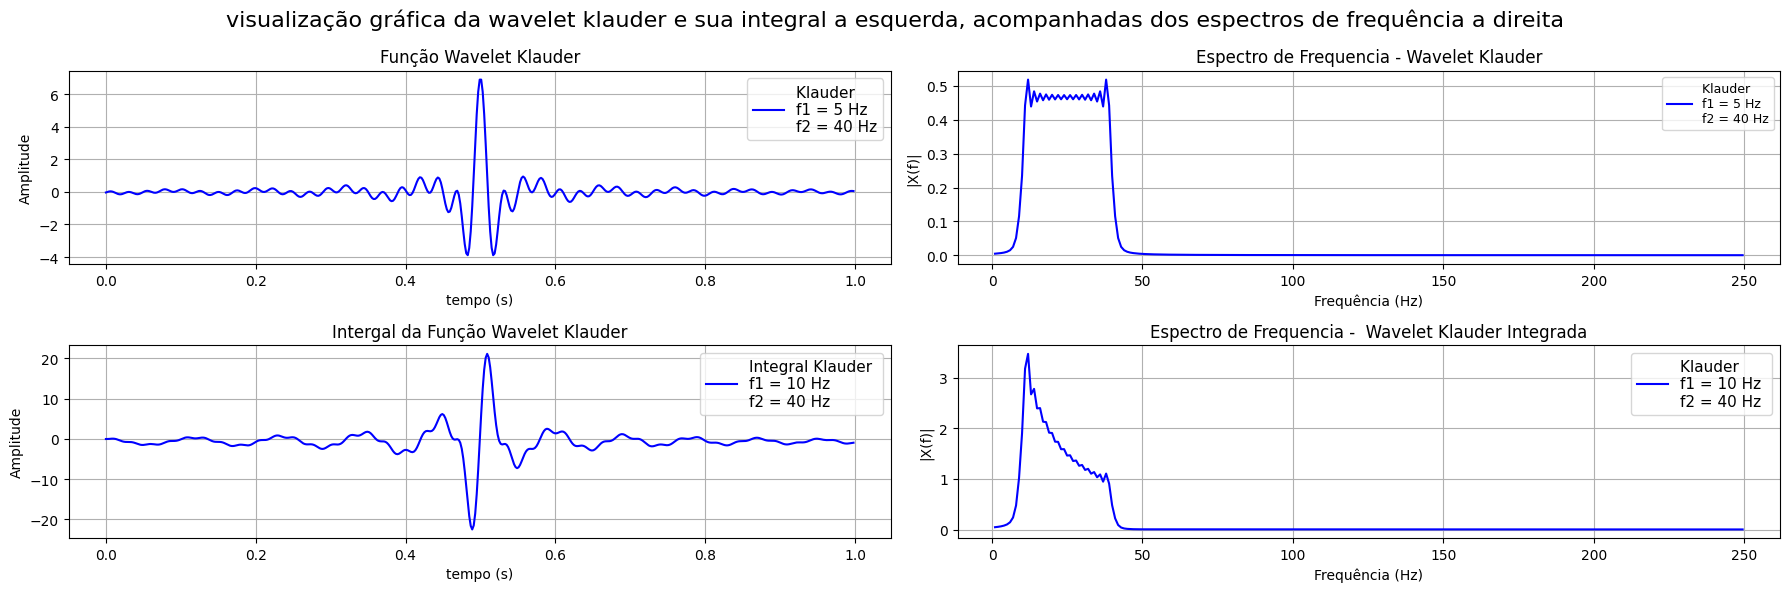

In [ ]:
plt.figure(figsize=(18, 6))
plt.suptitle("visualização gráfica da wavelet klauder e sua integral a esquerda, acompanhadas dos espectros de frequência a direita", fontsize=16)

# Plot wavelet klauder
plt.subplot(2,2,1)
plt.title('Função Wavelet Klauder', fontsize=12)
plt.plot(t, Kl, 'b-', label = 'Klauder \nf1 = {} Hz \nf2 = {} Hz'.format(f1, f2k))
plt.grid()
plt.xlabel('tempo (s)', fontsize=10) # Legenda do eixo x
plt.ylabel('Amplitude', fontsize=10)  # Legenda do eixo y
plt.legend(loc='upper right', fontsize=11)

plt.subplot(2,2,2)
plt.title('Espectro de Frequencia - Wavelet Klauder', fontsize=12)
plt.plot(freqk[mascara], fft_absk[mascara], 'b-', label = 'Klauder \nf1 = {} Hz \nf2 = {} Hz'.format(f1, f2k))
plt.grid()
plt.xlabel('Frequência (Hz)', fontsize=10)  # legenda do eixo x
plt.ylabel('|X(f)|', fontsize=10)  # legenda do eixo y
plt.legend(loc='upper right', fontsize=9)

# Plot integral wavelet klauder
plt.subplot(2,2,3)
plt.title('Intergal da Função Wavelet Klauder', fontsize=12)
plt.plot(t, int_K, 'b-', label = 'Integral Klauder \nf1 = {} Hz \nf2 = {} Hz'.format(f1k, f2k))
plt.grid()
plt.xlabel('tempo (s)', fontsize=10) # Legenda do eixo x
plt.ylabel('Amplitude', fontsize=10)  # Legenda do eixo y
plt.legend(loc='upper right', fontsize=11)

plt.subplot(2,2,4)
plt.title('Espectro de Frequencia -  Wavelet Klauder Integrada', fontsize=12)
plt.plot(freq_intK[mascara], fft_abs_intK[mascara], 'b-', label = 'Klauder \nf1 = {} Hz \nf2 = {} Hz'.format(f1k, f2k))
plt.grid()
plt.xlabel('Frequência (Hz)', fontsize=10)  # legenda do eixo x
plt.ylabel('|X(f)|', fontsize=10)  # legenda do eixo y
plt.legend(loc='upper right', fontsize=11)

##############################################################################
plt.tight_layout()
plt.show()

In [ ]:
# Perfil Velocidade
velocidade = np.zeros(n)
v1 = velocidade[0:int(n/5)] = 1500   # Velocidade da Agua
v2 = velocidade[int(n/5):int(2*n/5)] = 4000  # Velocidade no Arenito
v3 = velocidade[int(2*n/5):int(3*n/5)] = 2000 # Velocidade no Argilito
v4 = velocidade[int(3*n/5):int(4*n/5)] = 4500  # Velocidade no Sal
v5 = velocidade[int(4*n/5):int(5*n/5)] = 5000  # Velocidade no Carbonato

# Perfil Densidade
densidade = np.zeros(n)
d1 = densidade[0:int(n/5)] = 1000  # Densidade da Agua
d2 = densidade[int(n/5):int(2*n/5)] = 2600  # Densidade do Arenito
d3 = densidade[int(2*n/5):int(3*n/5)] = 1800  # Densidade do Argilito
d4 = densidade[int(3*n/5):int(4*n/5)] = 2200   # Densidade do Sal
d5 = densidade[int(4*n/5):int(5*n/5)] = 2500  # Densidade do Carbonato

# Construindo um perfil litológico
Agua = np.zeros(n)
Agua[0:int(n / 5)] = 1000

Arenito = np.zeros(n)
Arenito[int(n / 5):int(2 * n / 5)] = 2600

Argilito = np.zeros(n)
Argilito[int(2 * n / 5):int(3 * n / 5)] = 1800

Sal = np.zeros(n)
Sal[int(3 * n / 5):int(4 * n / 5)] = 2200

Carbonato = np.zeros(n)
Carbonato[int(4 * n / 5):n] = 2500

camadas = [Agua, Arenito, Argilito, Sal, Carbonato]
cores_sedimentos = {5: 'blue', 4: 'khaki', 3: 'sienna', 2: 'lightgray', 1: 'lightblue'}


# Calculo da Impedância e Refletividade
z = velocidade*densidade  # Calculo da Impedância
z
# Calculo da Refletividade
refletividade =  reflectivity(velocidade,densidade)

# Convolvendo a refletividade com cada uma das wavelets e gerendo traços sismicos sinteticos
sf = np.convolve(R, refletividade, mode='same')   # Convolução da Refletividade com a wavelet ricker


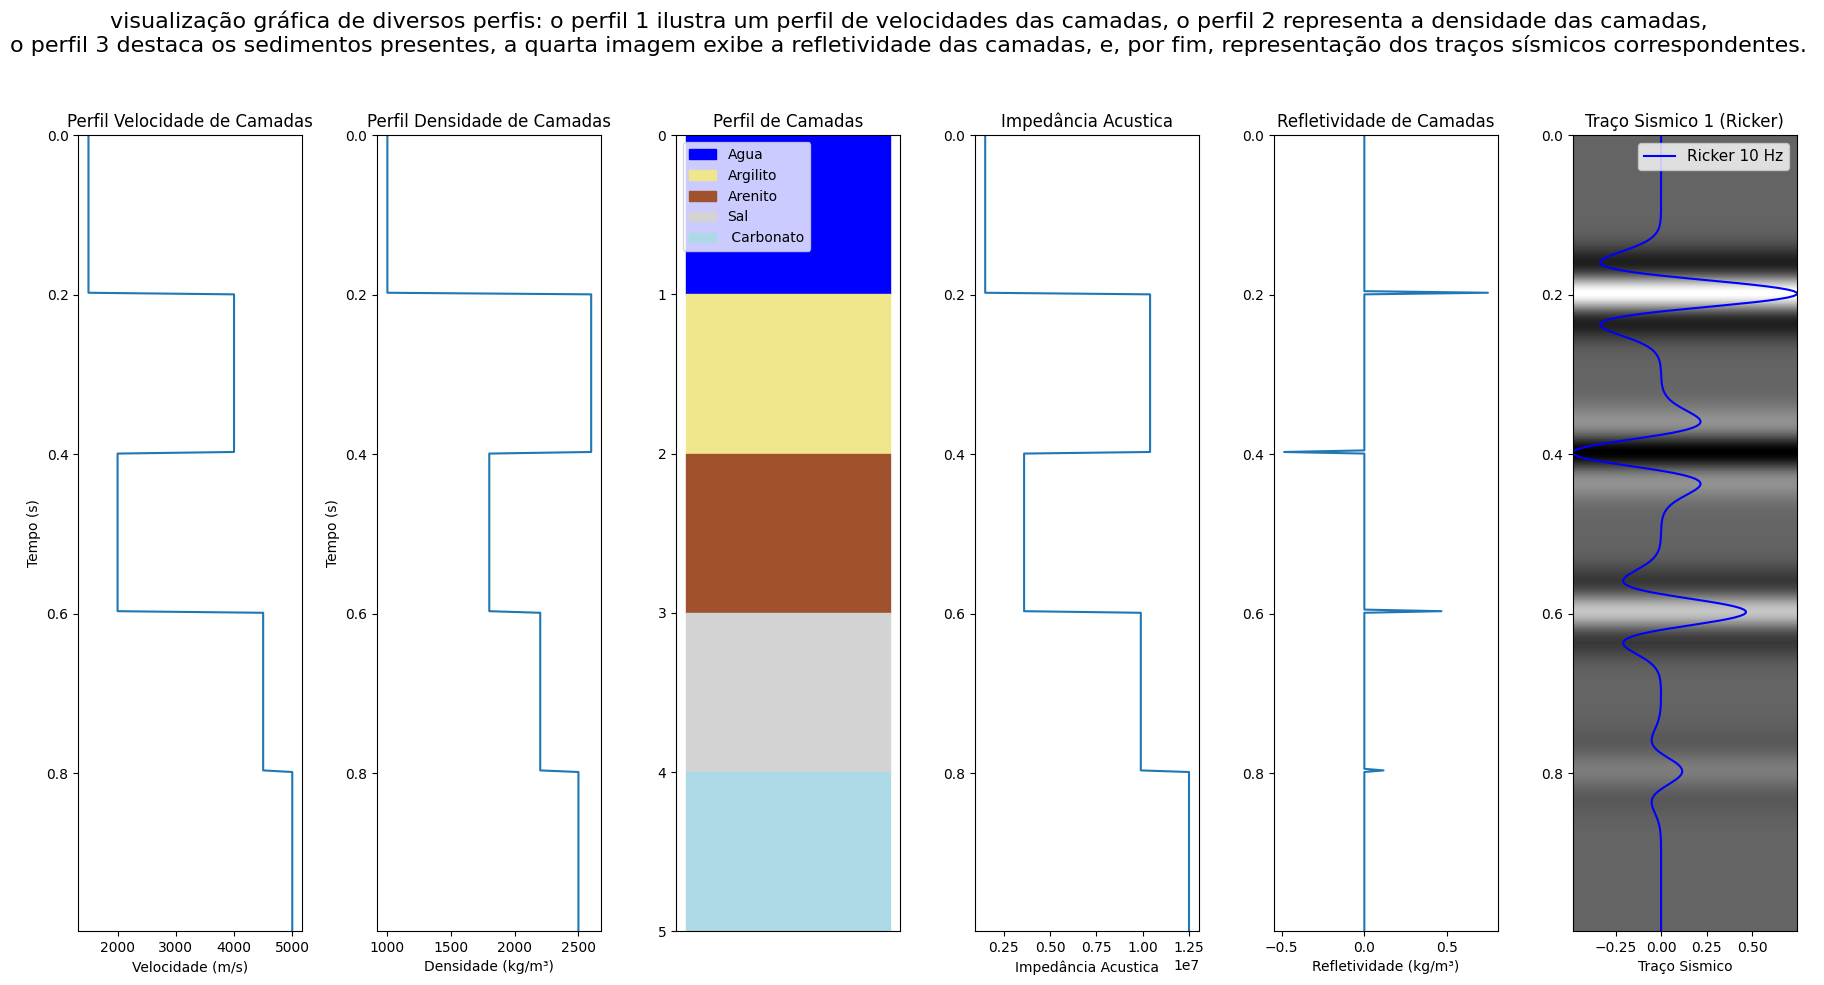

In [ ]:
plt.figure(figsize=(18, 10))
plt.suptitle("visualização gráfica de diversos perfis: o perfil 1 ilustra um perfil de velocidades das camadas, o perfil 2 representa a densidade das camadas, \no perfil 3 destaca os sedimentos presentes, a quarta imagem exibe a refletividade das camadas, e, por fim, representação dos traços sísmicos correspondentes. \n \n", fontsize=16)

# Plot Perfil de Velocidade
plt.subplot(1,6,1)
plt.plot(velocidade,t)
plt.title('Perfil Velocidade de Camadas')
plt.xlabel('Velocidade (m/s)')
plt.ylabel('Tempo (s)')
plt.ylim(max(t), min(t))

# Plot Perfil de Densidade
plt.subplot(1,6,2)
plt.plot(densidade,t)
plt.title('Perfil Densidade de Camadas')
plt.xlabel('Densidade (kg/m³)')
plt.ylabel('Tempo (s)')
#plt.yticks([])  # Remova as marcações do eixo y
plt.ylim(max(t), min(t))

# Gráfico de Perfil Litológico (deitado)
plt.subplot(1, 6, 3)
leg_cor = ["Agua", "Argilito", "Arenito", "Sal",' Carbonato'] # legenda de cores
for i, camada in enumerate(camadas):
    plt.fill_betweenx([i, i + 1], 0, 1, color=cores_sedimentos[5 - i],label=leg_cor[i])

plt.title('Perfil de Camadas')
plt.xticks([])  # Remova as marcações do eixo x
#plt.yticks([])  # Remova as marcações do eixo y
plt.ylim(5,0)

plt.legend(loc='upper left',fontsize=10)

plt.subplot(1,6,4)
plt.plot(z,t)
plt.title('Impedância Acustica')
#plt.yticks([])  # Remova as marcações do eixo y
plt.xlabel('Impedância Acustica')
#plt.ylabel('Tempo (s)')
plt.ylim(max(t), min(t))

# Plot Refletividade de Camadas
plt.subplot(1,6,5)
plt.plot(refletividade,t)
plt.title('Refletividade de Camadas')
#plt.yticks([])  # Remova as marcações do eixo y
plt.xlabel('Refletividade (kg/m³)')
#plt.ylabel('Tempo (s)')
plt.ylim(max(t), min(t))

plt.subplot(1,6,6)
plt.plot(sf,t,'b', label='Ricker {} Hz'.format(fs))
plt.title('Traço Sismico 1 (Ricker)')
#plt.yticks([])  # Remova as marcações do eixo y
plt.xlabel('Traço Sismico')
#plt.ylabel('Tempo (s)')
plt.legend(loc='upper right', fontsize=11)
plt.gca().invert_yaxis()

plt.imshow(np.array([sf]*n).T, aspect='auto',
           extent=(np.min(sf),np.max(sf),
           np.max(t), np.min(t)), cmap='gray')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/transforms.py:2860: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])
/usr/local/lib/python3.10/dist-packages/matplotlib/transforms.py:762: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


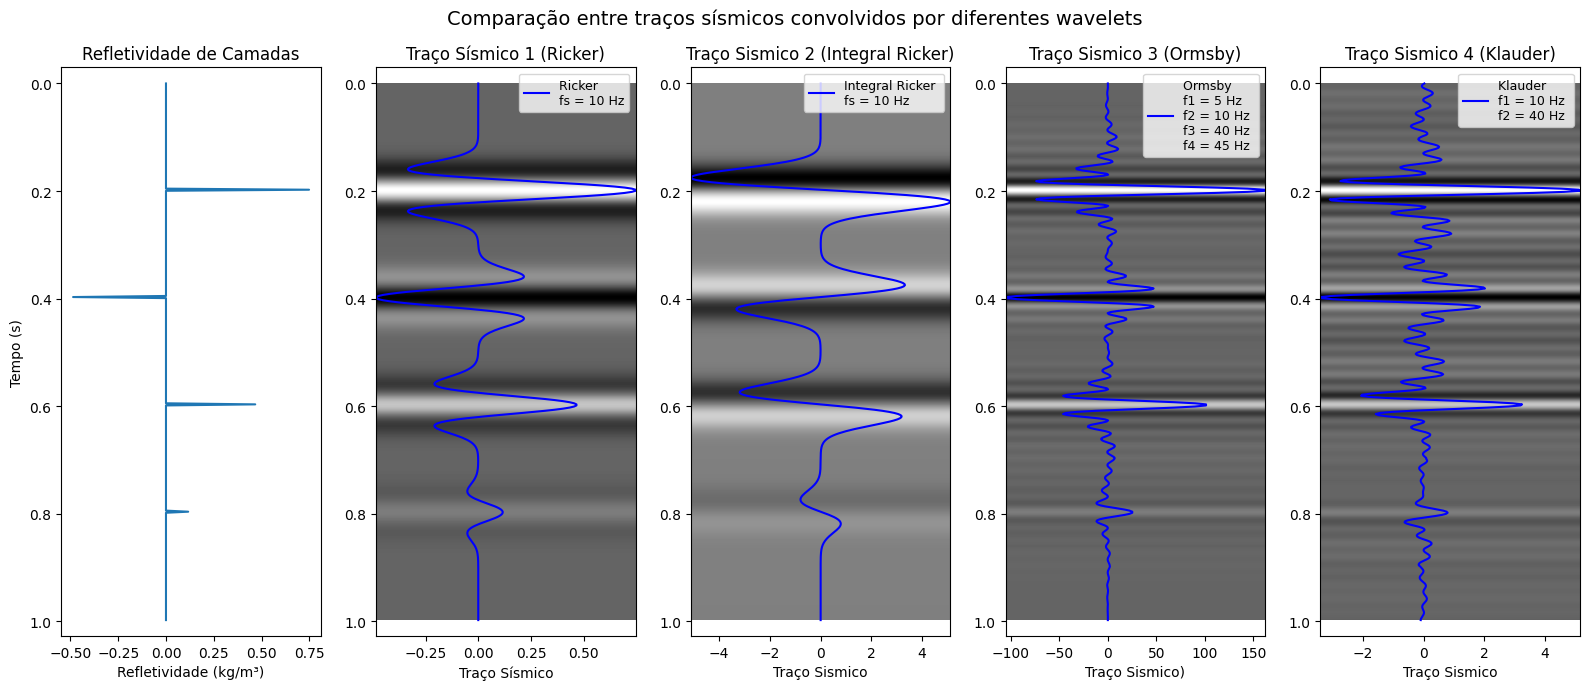

In [ ]:
# Convolvendo a refletividade com cada uma das wavelets e gerendo traços sismicos sinteticos
sf1 = np.convolve(R, refletividade, mode='same')   # Convolução da Refletividade com a wavelet ricker
sf2 = np.convolve(O, refletividade, mode='same')   # Convolução da Refletividade com a wavelet Ormsby
sf3 = np.convolve(Kl, refletividade, mode='same')  # Convolução da Refletividade com a wavelet klauder
sf4 = np.convolve(int_R, refletividade, mode='same')

# Plot dos Traços Sismicos
plt.figure(figsize=(16, 7))
plt.suptitle("Comparação entre traços sísmicos convolvidos por diferentes wavelets", fontsize=14)

plt.subplot(1, 5, 1)
plt.plot(refletividade, t)
plt.title('Refletividade de Camadas')
plt.xlabel('Refletividade (kg/m³)')
plt.ylabel('Tempo (s)')
plt.ylim(max(t) + 0.03, min(t) - 0.03)

plt.subplot(1, 5, 2)
plt.plot(sf1, t,'b', label='Ricker \nfs = {} Hz'.format(fs))
plt.ylim(max(t) + 0.03, min(t) - 0.03)
plt.title('Traço Sísmico 1 (Ricker)')
plt.xlabel('Traço Sísmico')
plt.legend(fontsize=9)
plt.imshow(np.array([sf1]*n).T, aspect='auto',
           extent=(np.min(sf1),np.max(sf1),
           np.max(t), np.min(t)), cmap='gray')

plt.subplot(1,5,3)
plt.plot(sf4,t,'b', label='Integral Ricker \nfs = {} Hz'.format(fs))
plt.ylim(max(t) + 0.03, min(t) - 0.03)
plt.title('Traço Sismico 2 (Integral Ricker)')
plt.xlabel('Traço Sismico')
#plt.ylabel('Tempo (s)')
plt.legend(fontsize=9)
plt.imshow(np.array([sf4]*n).T, aspect='auto',
           extent=(np.min(sf4),np.max(sf4),
           np.max(t), np.min(t)), cmap='gray')

plt.subplot(1,5,4)
plt.plot(sf2,t, 'b',label='Ormsby \nf1 = {} Hz \nf2 = {} Hz \nf3 = {} Hz \nf4 = {} Hz'.format(f1,f2,f3,f4))
plt.ylim(max(t) + 0.03, min(t) - 0.03)
plt.title('Traço Sismico 3 (Ormsby)')
plt.xlabel('Traço Sismico)')
#plt.ylabel('Tempo (s)')
plt.legend(loc='upper right', fontsize=9)
plt.imshow(np.array([sf2]*n).T, aspect='auto',
           extent=(np.min(sf2),np.max(sf2),
           np.max(t), np.min(t)), cmap='gray')

plt.subplot(1,5,5)
plt.plot(sf3,t, 'b', label='Klauder \nf1 = {} Hz \nf2 = {} Hz'.format(f1k, f2k))
plt.ylim(max(t) + 0.03, min(t) - 0.03)
plt.title('Traço Sismico 4 (Klauder)')
plt.xlabel('Traço Sismico')
#plt.ylabel('Tempo (s)')
plt.legend(loc='upper right', fontsize=9)
plt.imshow(np.real(np.array([sf3]*n)).T, aspect='auto',
           extent=(np.min(sf3), np.max(sf3),
           np.max(t), np.min(t)), cmap='gray')

plt.tight_layout()  # Ajusta o layout para evitar sobreposições
plt.show()

## Comparação dos Traços Sismicos com Wavelets de diferentes frequências

In [ ]:
# Definindo as Frequencia das Wavelets

 #frequencia do sinal ricker
fs_2 = 30
fs_3 = 60
fs_4 = 90

#Parametros de frequencia Ormsby
f1_2 = 5   # frequência de corte baixo
f2_2 = 10  # frequência passa-baixa
f3_2 = 55  # frequência passa-alta
f4_2 = 70  # frequência de corte alta

#Parametros de frequencia Ormsby
f1_3 = 5   # frequência de corte baixo
f2_3 = 10  # frequência passa-baixa
f3_3 = 135  # frequência passa-alta
f4_3 = 140  # frequência de corte alta

#Parametros de frequencia Ormsby
f1_4 = 5   # frequência de corte baixo
f2_4 = 10  # frequência passa-baixa
f3_4 = 220  # frequência passa-alta
f4_4 = 225  # frequência de corte alta

# Parametro Klauder
f1k_2 = 10  # baixa frequência
f2k_2 = 65  # alta frequência

f1k_3 = 10  # baixa frequência
f2k_3 = 135  # alta frequência

f1k_4 = 10  # baixa frequência
f2k_4 = 220 # alta frequência

# Calculos das Funções
# 1 ###########################################################
# Função Wavelet Ricker
R2 = Ricker(fs_2, t-tlag)
mascara, freqR2, fft_absR2 = fft_wavelet(n, R2, dt)

R3 = Ricker(fs_3, t-tlag)
mascara, freqR3, fft_absR3 = fft_wavelet(n, R3, dt)

R4 = Ricker(fs_4, t-tlag)
mascara, freqR4, fft_absR4 = fft_wavelet(n, R4, dt)

# Integral  da wavelet Ricker
int_R2 = np.cumsum(R2)
mascara, freq_intR2, fft_abs_intR2 = fft_wavelet(n, int_R2, dt)

int_R3 = np.cumsum(R3)
mascara, freq_intR3, fft_abs_intR3 = fft_wavelet(n, int_R3, dt)

int_R4 = np.cumsum(R4)
mascara, freq_intR4, fft_abs_intR4 = fft_wavelet(n, int_R4, dt)
# ##############################################################

# 2 ############################################################
#Função Wavelet Ormsby
O2 = Ormsby(f1_2, f2_2, f3_2, f4_2, t-tlag)
mascara, freqO2, fft_absO2 = fft_wavelet(n, O2, dt)

O3 = Ormsby(f1_3, f2_3, f3_3, f4_3, t-tlag)
mascara, freqO3, fft_absO3 = fft_wavelet(n, O3, dt)

O4 = Ormsby(f1_4, f2_4, f3_4, f4_4, t-tlag)
mascara, freqO4, fft_absO4 = fft_wavelet(n, O4, dt)

# 3 ############################################################
#Função Wavelet Klauder
Kl2 = Klauder(TT, t-tlag, f1k_2, f2k_2)
mascara, freqk2, fft_absk2 = fft_wavelet(n, Kl2, dt)

Kl3 = Klauder(TT, t-tlag, f1k_3, f2k_3)
mascara, freqk3, fft_absk3 = fft_wavelet(n, Kl3, dt)

Kl4 = Klauder(TT, t-tlag, f1k_4, f2k_4)
mascara, freqk4, fft_absk4 = fft_wavelet(n, Kl4, dt)

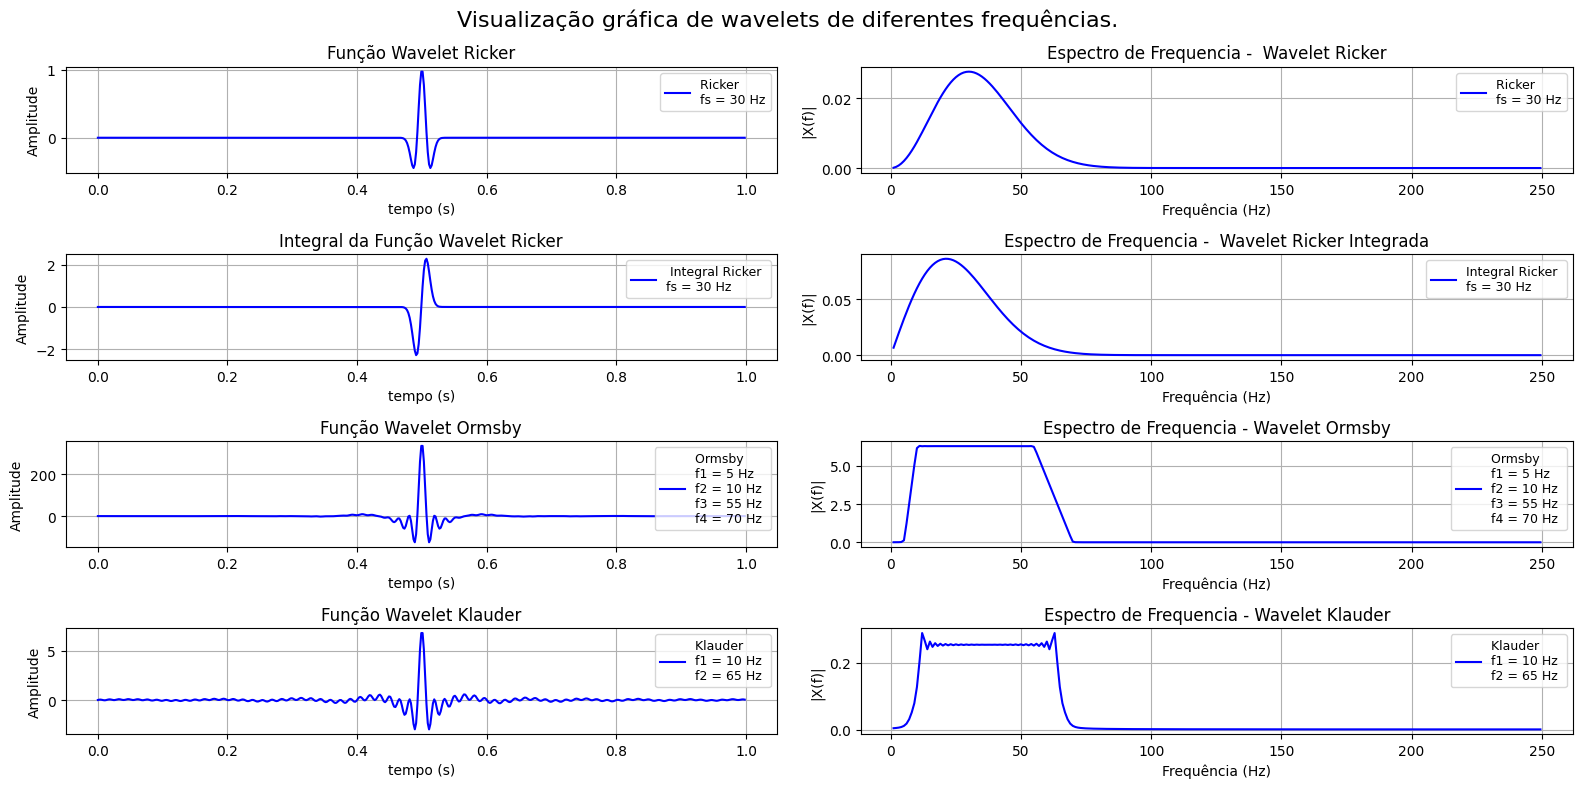

#######################################################################################


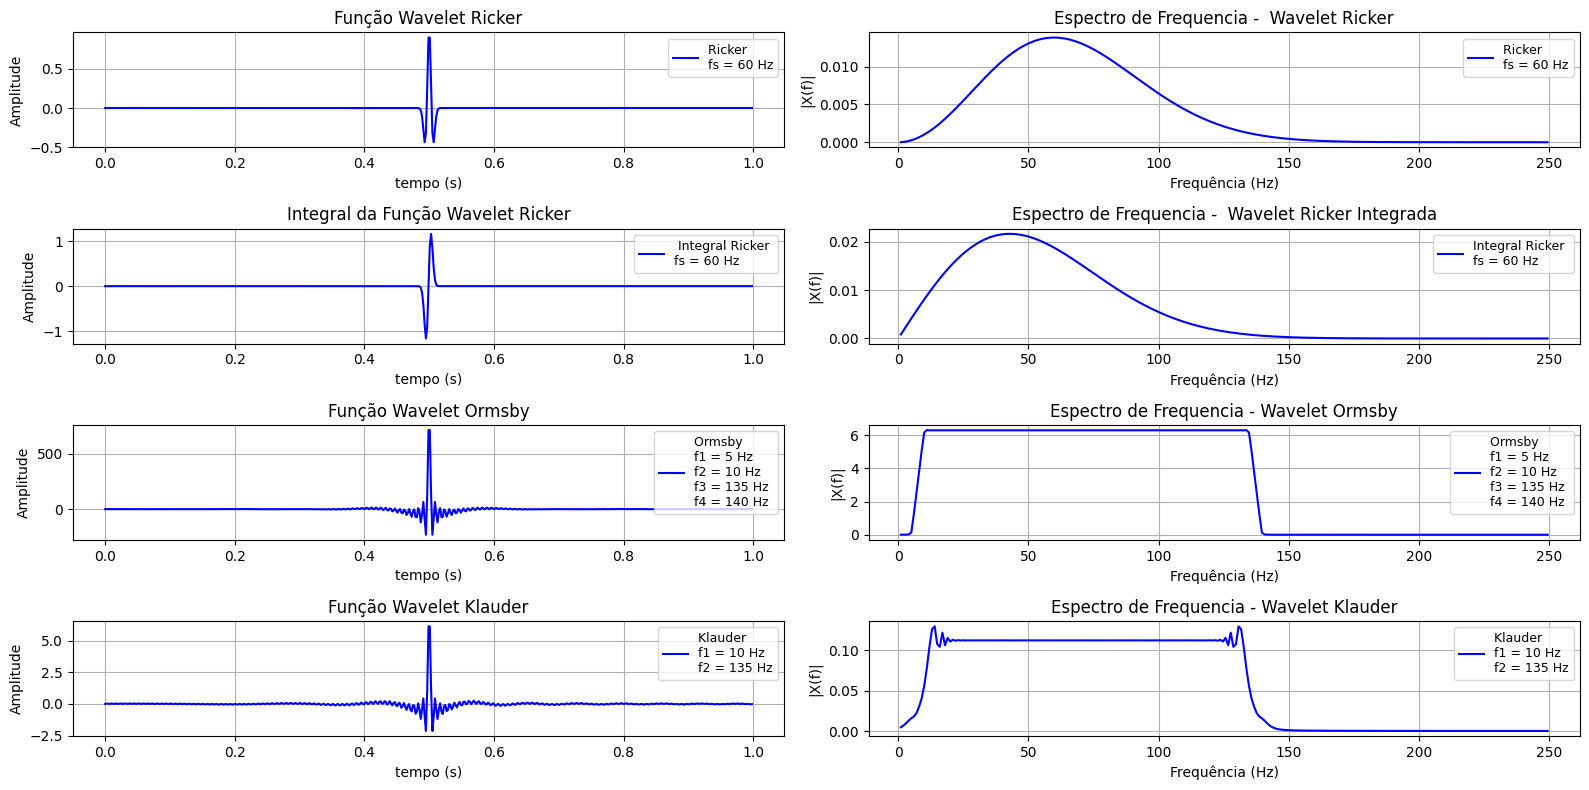

#######################################################################################


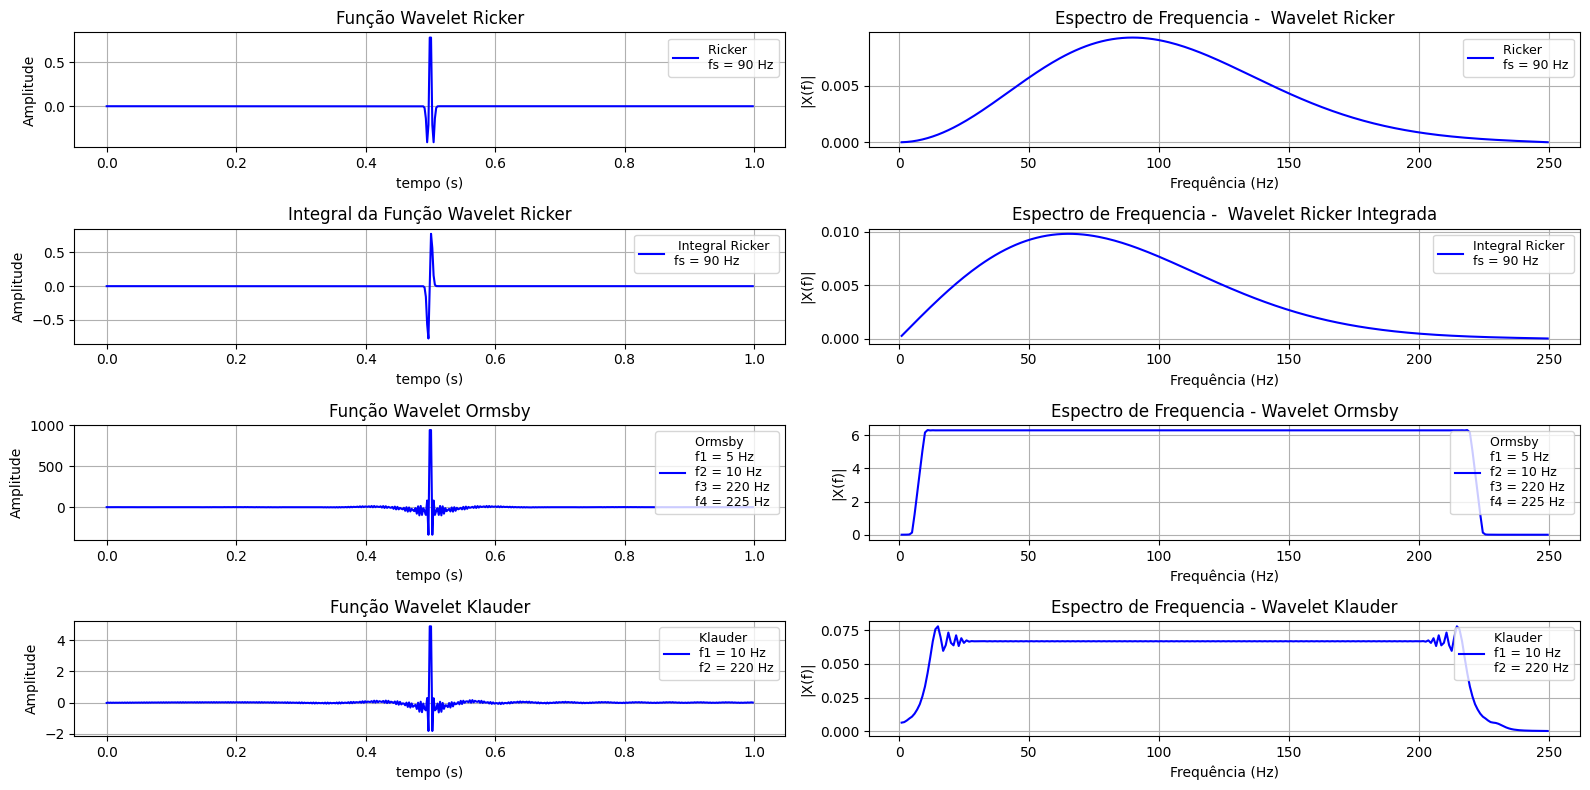

In [ ]:
# PLOT DOS GRAFICOS

plt.figure(figsize=(16, 8))
plt.suptitle("Visualização gráfica de wavelets de diferentes frequências.", fontsize=16)

# Plot wavelet ricker
plt.subplot(4,2,1)
plt.title('Função Wavelet Ricker', fontsize=12)
plt.plot(t, R2, 'b', label="Ricker \nfs = {} Hz".format(fs_2))
plt.grid()
plt.xlabel('tempo (s)', fontsize=10) # Legenda do eixo x
plt.ylabel('Amplitude', fontsize=10)  # Legenda do eixo y
plt.legend(loc='upper right', fontsize=9)

plt.subplot(4,2,2)
plt.title('Espectro de Frequencia -  Wavelet Ricker', fontsize=12)
plt.plot(freqR2[mascara], fft_absR2[mascara], 'b', label="Ricker \nfs = {} Hz".format(fs_2))
plt.grid()
plt.xlabel('Frequência (Hz)', fontsize=10)  # legenda do eixo x
plt.ylabel('|X(f)|', fontsize=10)  # legenda do eixo y
plt.legend(loc='upper right', fontsize=9)

# Plot integral wavelet ricker
plt.subplot(4,2,3)
plt.title('Integral da Função Wavelet Ricker', fontsize=12)
plt.plot(t, int_R2, 'b', label=" Integral Ricker \nfs = {} Hz".format(fs_2))
plt.grid()
plt.xlabel('tempo (s)', fontsize=10) # Legenda do eixo x
plt.ylabel('Amplitude', fontsize=10)  # Legenda do eixo y
plt.legend(loc='upper right', fontsize=9)

plt.subplot(4,2,4)
plt.title('Espectro de Frequencia -  Wavelet Ricker Integrada', fontsize=12)
plt.plot(freq_intR2[mascara], fft_abs_intR2[mascara], 'b',  label="Integral Ricker \nfs = {} Hz".format(fs_2))
plt.grid()
plt.xlabel('Frequência (Hz)', fontsize=10)  # legenda do eixo x
plt.ylabel('|X(f)|', fontsize=10)  # legenda do eixo y
plt.legend(loc='upper right', fontsize=9)

############################################################################

# plot wavalet ormsby
plt.subplot(4,2,5)
plt.title('Função Wavelet Ormsby', fontsize=12)
plt.plot(t, O2, 'b-', label= 'Ormsby \nf1 = {} Hz \nf2 = {} Hz \nf3 = {} Hz \nf4 = {} Hz'.format(f1_2, f2_2, f3_2, f4_2))
plt.grid()
plt.xlabel('tempo (s)', fontsize=10) # Legenda do eixo x
plt.ylabel('Amplitude', fontsize=10)  # Legenda do eixo y
plt.legend(loc='upper right', fontsize=9)

plt.subplot(4,2,6)
plt.title('Espectro de Frequencia - Wavelet Ormsby', fontsize=12)
plt.plot(freqO2[mascara], fft_absO2[mascara], 'b-', label = 'Ormsby \nf1 = {} Hz \nf2 = {} Hz \nf3 = {} Hz \nf4 = {} Hz'.format(f1_2, f2_2, f3_2, f4_2))
plt.grid()
plt.xlabel('Frequência (Hz)', fontsize=10)  # legenda do eixo x
plt.ylabel('|X(f)|', fontsize=10)  # legenda do eixo y
plt.legend(loc='upper right', fontsize=9)

############################################################################

# Plot wavelet klauder
plt.subplot(4,2,7)
plt.title('Função Wavelet Klauder', fontsize=12)
plt.plot(t, Kl2, 'b-', label = 'Klauder \nf1 = {} Hz \nf2 = {} Hz'.format(f1k_2, f2k_2))
plt.grid()
plt.xlabel('tempo (s)', fontsize=10) # Legenda do eixo x
plt.ylabel('Amplitude', fontsize=10)  # Legenda do eixo y
plt.legend(loc='upper right', fontsize=9)

plt.subplot(4,2,8)
plt.title('Espectro de Frequencia - Wavelet Klauder', fontsize=12)
plt.plot(freqk2[mascara], fft_absk2[mascara], 'b-', label = 'Klauder \nf1 = {} Hz \nf2 = {} Hz'.format(f1k_2, f2k_2))
plt.grid()
plt.xlabel('Frequência (Hz)', fontsize=10)  # legenda do eixo x
plt.ylabel('|X(f)|', fontsize=10)  # legenda do eixo y
plt.legend(loc='upper right', fontsize=9)

##############################################################################
plt.tight_layout()
plt.show()

print("#######################################################################################")

# PLOT DOS GRAFICOS
plt.figure(figsize=(16, 8))

# Plot wavelet ricker
plt.subplot(4,2,1)
plt.title('Função Wavelet Ricker', fontsize=12)
plt.plot(t, R3, 'b', label="Ricker \nfs = {} Hz".format(fs_3))
plt.grid()
plt.xlabel('tempo (s)', fontsize=10) # Legenda do eixo x
plt.ylabel('Amplitude', fontsize=10)  # Legenda do eixo y
plt.legend(loc='upper right', fontsize=9)

plt.subplot(4,2,2)
plt.title('Espectro de Frequencia -  Wavelet Ricker', fontsize=12)
plt.plot(freqR3[mascara], fft_absR3[mascara], 'b', label="Ricker \nfs = {} Hz".format(fs_3))
plt.grid()
plt.xlabel('Frequência (Hz)', fontsize=10)  # legenda do eixo x
plt.ylabel('|X(f)|', fontsize=10)  # legenda do eixo y
plt.legend(loc='upper right', fontsize=9)

# Plot integral wavelet ricker
plt.subplot(4,2,3)
plt.title('Integral da Função Wavelet Ricker', fontsize=12)
plt.plot(t, int_R3, 'b', label=" Integral Ricker \nfs = {} Hz".format(fs_3))
plt.grid()
plt.xlabel('tempo (s)', fontsize=10) # Legenda do eixo x
plt.ylabel('Amplitude', fontsize=10)  # Legenda do eixo y
plt.legend(loc='upper right', fontsize=9)

plt.subplot(4,2,4)
plt.title('Espectro de Frequencia -  Wavelet Ricker Integrada', fontsize=12)
plt.plot(freq_intR3[mascara], fft_abs_intR3[mascara], 'b',  label="Integral Ricker \nfs = {} Hz".format(fs_3))
plt.grid()
plt.xlabel('Frequência (Hz)', fontsize=10)  # legenda do eixo x
plt.ylabel('|X(f)|', fontsize=10)  # legenda do eixo y
plt.legend(loc='upper right', fontsize=9)

############################################################################

# plot wavalet ormsby
plt.subplot(4,2,5)
plt.title('Função Wavelet Ormsby', fontsize=12)
plt.plot(t, O3, 'b-', label= 'Ormsby \nf1 = {} Hz \nf2 = {} Hz \nf3 = {} Hz \nf4 = {} Hz'.format(f1_3, f2_3, f3_3, f4_3))
plt.grid()
plt.xlabel('tempo (s)', fontsize=10) # Legenda do eixo x
plt.ylabel('Amplitude', fontsize=10)  # Legenda do eixo y
plt.legend(loc='upper right', fontsize=9)

plt.subplot(4,2,6)
plt.title('Espectro de Frequencia - Wavelet Ormsby', fontsize=12)
plt.plot(freqO3[mascara], fft_absO3[mascara], 'b-', label = 'Ormsby \nf1 = {} Hz \nf2 = {} Hz \nf3 = {} Hz \nf4 = {} Hz'.format(f1_3, f2_3, f3_3, f4_3))
plt.grid()
plt.xlabel('Frequência (Hz)', fontsize=10)  # legenda do eixo x
plt.ylabel('|X(f)|', fontsize=10)  # legenda do eixo y
plt.legend(loc='upper right', fontsize=9)

############################################################################

# Plot wavelet klauder
plt.subplot(4,2,7)
plt.title('Função Wavelet Klauder', fontsize=12)
plt.plot(t, Kl3, 'b-', label = 'Klauder \nf1 = {} Hz \nf2 = {} Hz'.format(f1k_3, f2k_3))
plt.grid()
plt.xlabel('tempo (s)', fontsize=10) # Legenda do eixo x
plt.ylabel('Amplitude', fontsize=10)  # Legenda do eixo y
plt.legend(loc='upper right', fontsize=9)

plt.subplot(4,2,8)
plt.title('Espectro de Frequencia - Wavelet Klauder', fontsize=12)
plt.plot(freqk3[mascara], fft_absk3[mascara], 'b-', label = 'Klauder \nf1 = {} Hz \nf2 = {} Hz'.format(f1k_3, f2k_3))
plt.grid()
plt.xlabel('Frequência (Hz)', fontsize=10)  # legenda do eixo x
plt.ylabel('|X(f)|', fontsize=10)  # legenda do eixo y
plt.legend(loc='upper right', fontsize=9)

##############################################################################
plt.tight_layout()
plt.show()

print("#######################################################################################")

# PLOT DOS GRAFICOS
plt.figure(figsize=(16, 8))

# Plot wavelet ricker
plt.subplot(4,2,1)
plt.title('Função Wavelet Ricker', fontsize=12)
plt.plot(t, R4, 'b', label="Ricker \nfs = {} Hz".format(fs_4))
plt.grid()
plt.xlabel('tempo (s)', fontsize=10) # Legenda do eixo x
plt.ylabel('Amplitude', fontsize=10)  # Legenda do eixo y
plt.legend(loc='upper right', fontsize=9)

plt.subplot(4,2,2)
plt.title('Espectro de Frequencia -  Wavelet Ricker', fontsize=12)
plt.plot(freqR4[mascara], fft_absR4[mascara], 'b', label="Ricker \nfs = {} Hz".format(fs_4))
plt.grid()
plt.xlabel('Frequência (Hz)', fontsize=10)  # legenda do eixo x
plt.ylabel('|X(f)|', fontsize=10)  # legenda do eixo y
plt.legend(loc='upper right', fontsize=9)

# Plot integral wavelet ricker
plt.subplot(4,2,3)
plt.title('Integral da Função Wavelet Ricker', fontsize=12)
plt.plot(t, int_R4, 'b', label=" Integral Ricker \nfs = {} Hz".format(fs_4))
plt.grid()
plt.xlabel('tempo (s)', fontsize=10) # Legenda do eixo x
plt.ylabel('Amplitude', fontsize=10)  # Legenda do eixo y
plt.legend(loc='upper right', fontsize=9)

plt.subplot(4,2,4)
plt.title('Espectro de Frequencia -  Wavelet Ricker Integrada', fontsize=12)
plt.plot(freq_intR4[mascara], fft_abs_intR4[mascara], 'b',  label="Integral Ricker \nfs = {} Hz".format(fs_4))
plt.grid()
plt.xlabel('Frequência (Hz)', fontsize=10)  # legenda do eixo x
plt.ylabel('|X(f)|', fontsize=10)  # legenda do eixo y
plt.legend(loc='upper right', fontsize=9)

############################################################################

# plot wavalet ormsby
plt.subplot(4,2,5)
plt.title('Função Wavelet Ormsby', fontsize=12)
plt.plot(t, O4, 'b-', label= 'Ormsby \nf1 = {} Hz \nf2 = {} Hz \nf3 = {} Hz \nf4 = {} Hz'.format(f1_4, f2_4, f3_4, f4_4))
plt.grid()
plt.xlabel('tempo (s)', fontsize=10) # Legenda do eixo x
plt.ylabel('Amplitude', fontsize=10)  # Legenda do eixo y
plt.legend(loc='upper right', fontsize=9)

plt.subplot(4,2,6)
plt.title('Espectro de Frequencia - Wavelet Ormsby', fontsize=12)
plt.plot(freqO4[mascara], fft_absO4[mascara], 'b-', label = 'Ormsby \nf1 = {} Hz \nf2 = {} Hz \nf3 = {} Hz \nf4 = {} Hz'.format(f1_4, f2_4, f3_4, f4_4))
plt.grid()
plt.xlabel('Frequência (Hz)', fontsize=10)  # legenda do eixo x
plt.ylabel('|X(f)|', fontsize=10)  # legenda do eixo y
plt.legend(loc='upper right', fontsize=9)

############################################################################

# Plot wavelet klauder
plt.subplot(4,2,7)
plt.title('Função Wavelet Klauder', fontsize=12)
plt.plot(t, Kl4, 'b-', label = 'Klauder \nf1 = {} Hz \nf2 = {} Hz'.format(f1k_4, f2k_4))
plt.grid()
plt.xlabel('tempo (s)', fontsize=10) # Legenda do eixo x
plt.ylabel('Amplitude', fontsize=10)  # Legenda do eixo y
plt.legend(loc='upper right', fontsize=9)

plt.subplot(4,2,8)
plt.title('Espectro de Frequencia - Wavelet Klauder', fontsize=12)
plt.plot(freqk4[mascara], fft_absk4[mascara], 'b-', label = 'Klauder \nf1 = {} Hz \nf2 = {} Hz'.format(f1k_4, f2k_4))
plt.grid()
plt.xlabel('Frequência (Hz)', fontsize=10)  # legenda do eixo x
plt.ylabel('|X(f)|', fontsize=10)  # legenda do eixo y
plt.legend(loc='upper right', fontsize=9)

##############################################################################
plt.tight_layout()
plt.show()

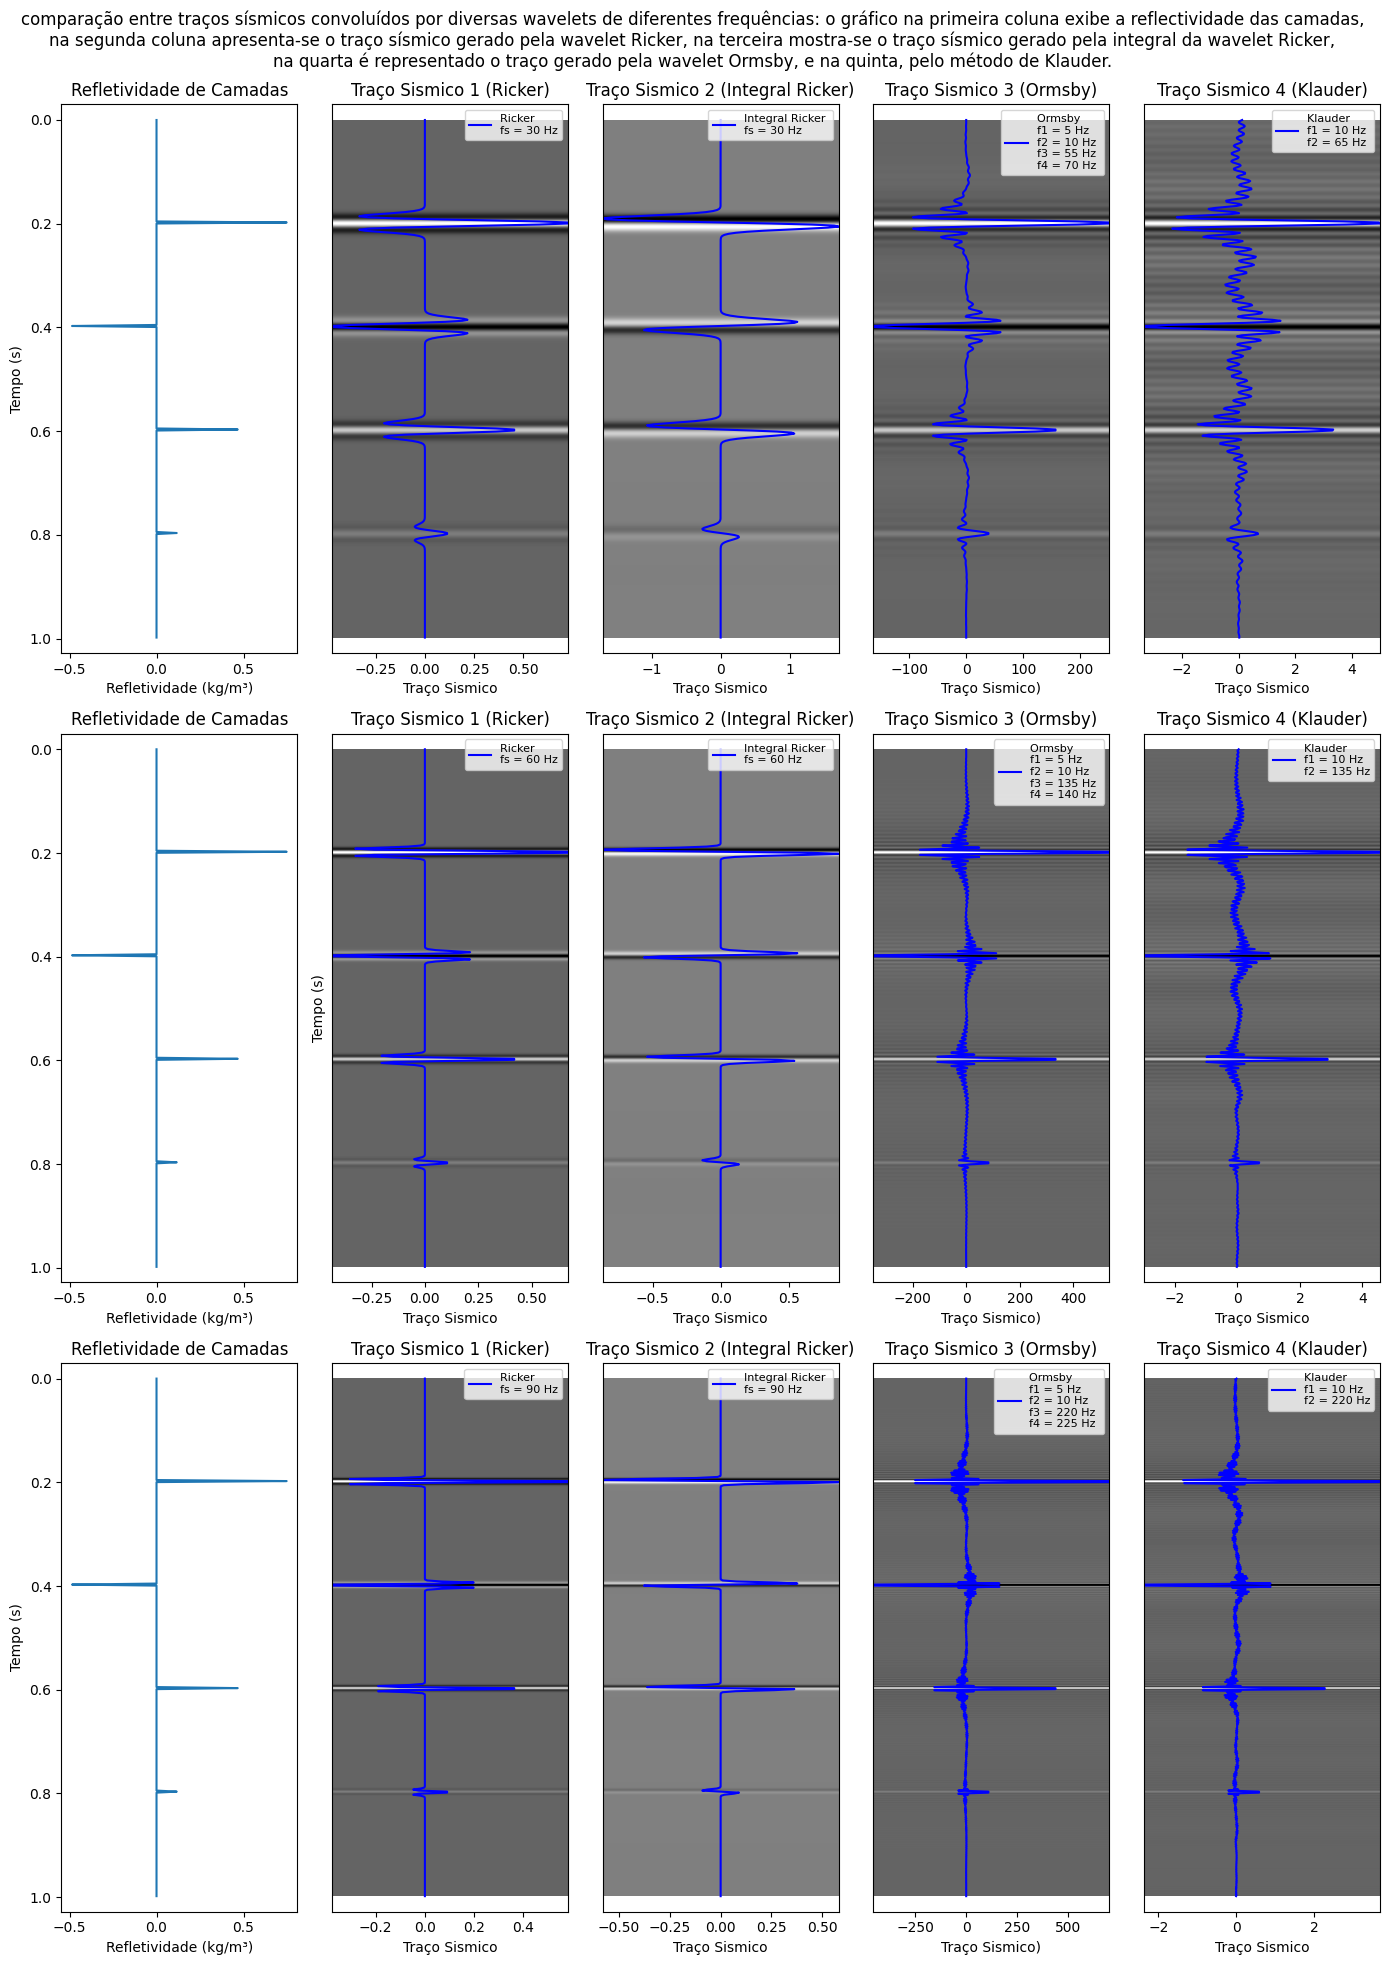

In [ ]:
# Convolvendo a refletividade com cada uma das wavelets e gerendo traços sismicos sinteticos
sf1_2 = np.convolve(R2, refletividade, mode='same')   # Convolução da Refletividade com a wavelet ricker
sf2_2 = np.convolve(O2, refletividade, mode='same')   # Convolução da Refletividade com a wavelet Ormsby
sf3_2 = np.convolve(Kl2, refletividade,mode='same')  # Convolução da Refletividade com a wavelet klauder
sf4_2 = np.convolve(int_R2, refletividade,mode='same') # Convolução da Refletividade com a Integral da wavelet Ricker

sf1_3 = np.convolve(R3, refletividade,mode='same')   # Convolução da Refletividade com a wavelet ricker
sf2_3 = np.convolve(O3, refletividade,mode='same')   # Convolução da Refletividade com a wavelet Ormsby
sf3_3 = np.convolve(Kl3, refletividade,mode='same')  # Convolução da Refletividade com a wavelet klauder
sf4_3 = np.convolve(int_R3, refletividade,mode='same') # Convolução da Refletividade com a Integral da wavelet Ricker

sf1_4 = np.convolve(R4, refletividade,mode='same')   # Convolução da Refletividade com a wavelet ricker
sf2_4 = np.convolve(O4, refletividade,mode='same')   # Convolução da Refletividade com a wavelet Ormsby
sf3_4 = np.convolve(Kl4, refletividade,mode='same')  # Convolução da Refletividade com a wavelet klauder
sf4_4 = np.convolve(int_R4, refletividade,mode='same') # Convolução da Refletividade com a Integral da wavelet Ricker

# Plot dos Traços Sismicos
plt.figure(figsize=(14,20))
plt.suptitle('comparação entre traços sísmicos convoluídos por diversas wavelets de diferentes frequências: o gráfico na primeira coluna exibe a reflectividade das camadas, \nna segunda coluna apresenta-se o traço sísmico gerado pela wavelet Ricker, na terceira mostra-se o traço sísmico gerado pela integral da wavelet Ricker, \nna quarta é representado o traço gerado pela wavelet Ormsby, e na quinta, pelo método de Klauder. \n', fontsize=12)

plt.subplot(3,5,1)
plt.plot(refletividade,t)
plt.title('Refletividade de Camadas')
#plt.yticks([])  # Remova as marcações do eixo y
plt.xlabel('Refletividade (kg/m³)')
plt.ylabel('Tempo (s)')
plt.ylim(max(t) + 0.03, min(t) - 0.03)

plt.subplot(3,5,2)
plt.plot(sf1_2,t,'b', label='Ricker \nfs = {} Hz'.format(fs_2))
plt.ylim(max(t) + 0.03, min(t) - 0.03)
plt.title('Traço Sismico 1 (Ricker)')
plt.xlabel('Traço Sismico')
#plt.ylabel('Tempo (s)')
plt.legend(loc='upper right', fontsize=8)
plt.yticks([])  # Remova as marcações do eixo y
plt.imshow(np.array([sf1_2]*n).T, aspect='auto',
           extent=(np.min(sf1_2),np.max(sf1_2),
           np.max(t), np.min(t)), cmap='gray')

plt.subplot(3,5,3)
plt.plot(sf4_2,t,'b', label='Integral Ricker \nfs = {} Hz'.format(fs_2))
plt.ylim(max(t) + 0.03, min(t) - 0.03)
plt.title('Traço Sismico 2 (Integral Ricker)')
plt.xlabel('Traço Sismico')
#plt.ylabel('Tempo (s)')
plt.legend(loc='upper right', fontsize=8)
plt.yticks([])  # Remova as marcações do eixo y
plt.imshow(np.array([sf4_2]*n).T, aspect='auto',
           extent=(np.min(sf4_2),np.max(sf4_2),
           np.max(t), np.min(t)), cmap='gray')

plt.subplot(3,5,4)
plt.plot(sf2_2,t,'b', label='Ormsby \nf1 = {} Hz \nf2 = {} Hz \nf3 = {} Hz \nf4 = {} Hz'.format(f1_2,f2_2,f3_2,f4_2))
plt.ylim(max(t) + 0.03, min(t) - 0.03)
plt.title('Traço Sismico 3 (Ormsby)')
plt.xlabel('Traço Sismico)')
#plt.ylabel('Tempo (s)')
plt.legend(loc='upper right', fontsize=8)
plt.yticks([])  # Remova as marcações do eixo y
plt.imshow(np.array([sf2_2]*n).T, aspect='auto',
           extent=(np.min(sf2_2),np.max(sf2_2),
           np.max(t), np.min(t)), cmap='gray')

plt.subplot(3,5,5)
plt.plot(sf3_2,t,'b', label='Klauder \nf1 = {} Hz \nf2 = {} Hz'.format(f1k_2, f2k_2))
plt.ylim(max(t) + 0.03, min(t) - 0.03)
plt.title('Traço Sismico 4 (Klauder)')
plt.xlabel('Traço Sismico')
#plt.ylabel('Tempo (s)')
plt.legend(loc='upper right', fontsize=8)
plt.yticks([])  # Remova as marcações do eixo y
plt.imshow(np.real(np.array([sf3_2]*n)).T, aspect='auto',
           extent=(np.min(sf3_2), np.max(sf3_2),
           np.max(t), np.min(t)), cmap='gray')

##############################################################
plt.subplot(3,5,6)
plt.plot(refletividade,t)
plt.title('Refletividade de Camadas')
#plt.yticks([])  # Remova as marcações do eixo y
plt.xlabel('Refletividade (kg/m³)')
#plt.ylabel('Tempo (s)')
plt.ylim(max(t) + 0.03, min(t) - 0.03)

plt.subplot(3,5,7)
plt.plot(sf1_3,t,'b', label='Ricker \nfs = {} Hz'.format(fs_3))
plt.ylim(max(t) + 0.03, min(t) - 0.03)
plt.title('Traço Sismico 1 (Ricker)')
plt.xlabel('Traço Sismico')
plt.ylabel('Tempo (s)')
plt.legend(loc='upper right', fontsize=8)
plt.yticks([])  # Remova as marcações do eixo y
plt.imshow(np.array([sf1_3]*n).T, aspect='auto',
           extent=(np.min(sf1_3),np.max(sf1_3),
           np.max(t), np.min(t)), cmap='gray')

plt.subplot(3,5,8)
plt.plot(sf4_3,t,'b', label='Integral Ricker \nfs = {} Hz'.format(fs_3))
plt.ylim(max(t) + 0.03, min(t) - 0.03)
plt.title('Traço Sismico 2 (Integral Ricker)')
plt.xlabel('Traço Sismico')
#plt.ylabel('Tempo (s)')
plt.legend(loc='upper right', fontsize=8)
plt.yticks([])  # Remova as marcações do eixo y
plt.imshow(np.array([sf4_3]*n).T, aspect='auto',
           extent=(np.min(sf4_3),np.max(sf4_3),
           np.max(t), np.min(t)), cmap='gray')

plt.subplot(3,5,9)
plt.plot(sf2_3,t,'b', label='Ormsby \nf1 = {} Hz \nf2 = {} Hz \nf3 = {} Hz \nf4 = {} Hz'.format(f1_3,f2_3,f3_3,f4_3))
plt.ylim(max(t) + 0.03, min(t) - 0.03)
plt.title('Traço Sismico 3 (Ormsby)')
plt.xlabel('Traço Sismico)')
#plt.ylabel('Tempo (s)')
plt.legend(loc='upper right', fontsize=8)
plt.yticks([])  # Remova as marcações do eixo y
plt.imshow(np.array([sf2_3]*n).T, aspect='auto',
           extent=(np.min(sf2_3),np.max(sf2_3),
           np.max(t), np.min(t)), cmap='gray')

plt.subplot(3,5,10)
plt.plot(sf3_3,t,'b', label='Klauder \nf1 = {} Hz \nf2 = {} Hz'.format(f1k_3, f2k_3))
plt.ylim(max(t) + 0.03, min(t) - 0.03)
plt.title('Traço Sismico 4 (Klauder)')
plt.xlabel('Traço Sismico')
#plt.ylabel('Tempo (s)')
plt.legend(loc='upper right', fontsize=8)
plt.yticks([])  # Remova as marcações do eixo y
plt.imshow(np.real(np.array([sf3_3]*n)).T, aspect='auto',
           extent=(np.min(sf3_3), np.max(sf3_3),
           np.max(t), np.min(t)), cmap='gray')

########################################################
plt.subplot(3,5,11)
plt.plot(refletividade,t)
plt.title('Refletividade de Camadas')
#plt.yticks([])  # Remova as marcações do eixo y
plt.xlabel('Refletividade (kg/m³)')
plt.ylabel('Tempo (s)')
plt.ylim(max(t) + 0.03, min(t) - 0.03)

plt.subplot(3,5,12)
plt.plot(sf1_4,t,'b', label='Ricker \nfs = {} Hz'.format(fs_4))
plt.ylim(max(t) + 0.03, min(t) - 0.03)
plt.title('Traço Sismico 1 (Ricker)')
plt.xlabel('Traço Sismico')
#plt.ylabel('Tempo (s)')
plt.legend(loc='upper right', fontsize=8)
plt.yticks([])  # Remova as marcações do eixo y
plt.imshow(np.array([sf1_4]*n).T, aspect='auto',
           extent=(np.min(sf1_4),np.max(sf1_4),
           np.max(t), np.min(t)), cmap='gray')


plt.subplot(3,5,13)
plt.plot(sf4_4,t,'b', label='Integral Ricker \nfs = {} Hz'.format(fs_4))
plt.ylim(max(t) + 0.03, min(t) - 0.03)
plt.title('Traço Sismico 2 (Integral Ricker)')
plt.xlabel('Traço Sismico')
#plt.ylabel('Tempo (s)')
plt.legend(loc='upper right', fontsize=8)
plt.yticks([])  # Remova as marcações do eixo y
plt.imshow(np.array([sf4_4]*n).T, aspect='auto',
           extent=(np.min(sf4_4),np.max(sf4_4),
           np.max(t), np.min(t)), cmap='gray')

plt.subplot(3,5,14)
plt.plot(sf2_4,t,'b', label='Ormsby \nf1 = {} Hz \nf2 = {} Hz \nf3 = {} Hz \nf4 = {} Hz'.format(f1_4,f2_4,f3_4,f4_4))
plt.ylim(max(t) + 0.03, min(t) - 0.03)
plt.title('Traço Sismico 3 (Ormsby)')
plt.xlabel('Traço Sismico)')
#plt.ylabel('Tempo (s)')
plt.legend(loc='upper right', fontsize=8)
plt.yticks([])  # Remova as marcações do eixo y
plt.imshow(np.array([sf2_4]*n).T, aspect='auto',
           extent=(np.min(sf2_4),np.max(sf2_4),
           np.max(t), np.min(t)), cmap='gray')

plt.subplot(3,5,15)
plt.plot(sf3_4,t,'b', label='Klauder \nf1 = {} Hz \nf2 = {} Hz'.format(f1k_4, f2k_4))
plt.ylim(max(t) + 0.03, min(t) - 0.03)
plt.title('Traço Sismico 4 (Klauder)')
plt.xlabel('Traço Sismico')
#plt.ylabel('Tempo (s)')
plt.legend(loc='upper right', fontsize=8)
plt.yticks([])  # Remova as marcações do eixo y
plt.imshow(np.real(np.array([sf3_4]*n)).T, aspect='auto',
           extent=(np.min(sf3_4), np.max(sf3_4),
           np.max(t), np.min(t)), cmap='gray')

# Criar uma legenda geral
plt.tight_layout()
plt.show()